In [1]:
import pandas as pd
from IPython.display import display
import sys
import os

print("Notebook ready.")

Notebook ready.


In [5]:
import pandas as pd

# Load CSV from repo root
df = pd.read_csv("../air_quality_health_impact_data.csv")  # move one folder up
print("Dataset loaded successfully!")
print(df.head())


Dataset loaded successfully!
   RecordID         AQI        PM10       PM2_5         NO2        SO2  \
0         1  187.270059  295.853039   13.038560    6.639263  66.161150   
1         2  475.357153  246.254703    9.984497   16.318326  90.499523   
2         3  365.996971   84.443191   23.111340   96.317811  17.875850   
3         4  299.329242   21.020609   14.273403   81.234403  48.323616   
4         5   78.009320   16.987667  152.111623  121.235461  90.866167   

           O3  Temperature   Humidity  WindSpeed  RespiratoryCases  \
0   54.624280     5.150335  84.424344   6.137755                 7   
1  169.621727     1.543378  46.851415   4.521422                10   
2    9.006794     1.169483  17.806977  11.157384                13   
3   93.161033    21.925276  99.473373  15.302500                 8   
4  241.795138     9.217517  24.906837  14.534733                 9   

   CardiovascularCases  HospitalAdmissions  HealthImpactScore  \
0                    5                  

In [ ]:
# === Load Dataset ===
display(df.head())
print("Shape:", df.shape)
print("Columns:", list(df.columns))


,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621727,1.543378,46.851415,4.521422,10,2,0,100.000000,0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0


Shape: (5811, 15)
Columns: ['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass']


In [ ]:
# === Data Cleaning & Preprocessing ===

# Drop columns not useful for regression
cols_to_drop = ["RecordID", "HealthImpactClass"]
df_clean = df.drop(columns=cols_to_drop, errors="ignore")

# Define features & target
X = df_clean.drop(columns=["HealthImpactScore"])
y = df_clean["HealthImpactScore"]

print("Cleaned Data Shape:", df_clean.shape)
print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

print("\nTrain:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


Cleaned Data Shape: (5811, 13)
Feature Shape: (5811, 12)
Target Shape: (5811,)

Train: (4648, 12) (4648,)
Test: (1163, 12) (1163,)


## Baseline Model Training & Comparison

In [ ]:
# === Baseline Model Comparison ===

!pip install xgboost lightgbm --quiet

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8),
    "LightGBM": LGBMRegressor(n_estimators=300, learning_rate=0.05)
}

results = []

print("Training baseline models...\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append([name, mae, rmse, r2])
    print(f"{name}: MAE={mae:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
print("\n=== Baseline Model Comparison ===")
display(results_df.sort_values("R2", ascending=False))


Training baseline models...

LinearRegression: MAE=7.3541, RMSE=9.6272, R²=0.5053
Ridge: MAE=7.3541, RMSE=9.6272, R²=0.5053
Lasso: MAE=7.3635, RMSE=9.6361, R²=0.5044
ElasticNet: MAE=7.3652, RMSE=9.6350, R²=0.5045
RandomForest: MAE=1.5439, RMSE=3.1453, R²=0.9472
ExtraTrees: MAE=1.2003, RMSE=2.4194, R²=0.9688
GradientBoosting: MAE=1.7047, RMSE=3.0237, R²=0.9512
KNN: MAE=1.3582, RMSE=2.8983, R²=0.9552
SVR: MAE=2.2941, RMSE=3.7704, R²=0.9241
XGBoost: MAE=1.5946, RMSE=2.7193, R²=0.9605
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2341
[LightGBM] [Info] Number of data points in the train set: 4648, number of used features: 12
[LightGBM] [Info] Start training from score 93.922841
LightGBM: MAE=1.0175, RMSE=2.0282, R²=0.9780

=== Baseline Model Comparison ===


,Model,MAE,RMSE,R2
10,LightGBM,1.017463,2.028215,0.978045
5,ExtraTrees,1.200340,2.419392,0.968759
9,XGBoost,1.594632,2.719291,0.960534
7,KNN,1.358224,2.898283,0.955168
6,GradientBoosting,1.704695,3.023738,0.951203
4,RandomForest,1.543910,3.145277,0.947201
8,SVR,2.294148,3.770396,0.924128
0,LinearRegression,7.354111,9.627195,0.505338
1,Ridge,7.354112,9.627195,0.505338
3,ElasticNet,7.365218,9.634989,0.504536


## LightGBM Hyperparameter Tuning.

In [ ]:
# === LightGBM Hyperparameter Tuning ===

from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

print("Running LightGBM Grid Search...")

lgbm = LGBMRegressor(random_state=42)

param_grid_lgbm = {
    "n_estimators": [300, 500, 800],
    "learning_rate": [0.05, 0.1],
    "max_depth": [-1, 5, 10],
    "num_leaves": [31, 50, 70],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.7, 1.0]
}

grid_lgbm = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    scoring="r2",
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_lgbm.fit(X_train, y_train)

print("\nBest Params (LightGBM):", grid_lgbm.best_params_)
print("Best CV R² (LightGBM):", grid_lgbm.best_score_)

best_lgbm = grid_lgbm.best_estimator_

# Evaluate on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

pred_lgbm = best_lgbm.predict(X_test)

mae_lgbm = mean_absolute_error(y_test, pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, pred_lgbm))
r2_lgbm = r2_score(y_test, pred_lgbm)

print("\n=== Tuned LightGBM Results ===")
print(f"MAE:  {mae_lgbm:.4f}")
print(f"RMSE: {rmse_lgbm:.4f}")
print(f"R²:   {r2_lgbm:.4f}")


Running LightGBM Grid Search...
Fitting 3 folds for each of 216 candidates, totalling 648 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2341
[LightGBM] [Info] Number of data points in the train set: 4648, number of used features: 12
[LightGBM] [Info] Start training from score 93.922841
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [ ]:
# === XGBoost Hyperparameter Tuning ===

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

print("Running XGBoost Grid Search...")

xgb_model = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

param_grid_xgb = {
    "n_estimators": [300, 600, 900],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [4, 6, 8],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.9, 1.0]
}

grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=3,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

print("\nBest Params (XGBoost):", grid_xgb.best_params_)
print("Best CV R² (XGBoost):", grid_xgb.best_score_)

best_xgb = grid_xgb.best_estimator_


Running XGBoost Grid Search...
Fitting 3 folds for each of 243 candidates, totalling 729 fits

Best Params (XGBoost): {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 900, 'subsample': 0.7}
Best CV R² (XGBoost): 0.9749635011991038


In [ ]:
# === Evaluate Final Tuned XGBoost Model ===

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Evaluating final tuned XGBoost model...")

# Predict
y_pred_xgb = best_xgb.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("\n=== Tuned XGBoost Results ===")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


Evaluating final tuned XGBoost model...

=== Tuned XGBoost Results ===
MAE:  1.1499
RMSE: 2.1088
R²:   0.9763



=== LightGBM Feature Importance ===
                feature  importance
0                   AQI        5999
2                 PM2_5        2812
5                    O3        2695
1                  PM10        2533
3                   NO2        2317
8             WindSpeed        1623
6           Temperature        1557
7              Humidity        1499
4                   SO2        1496
9      RespiratoryCases         541
10  CardiovascularCases         497
11   HospitalAdmissions         376


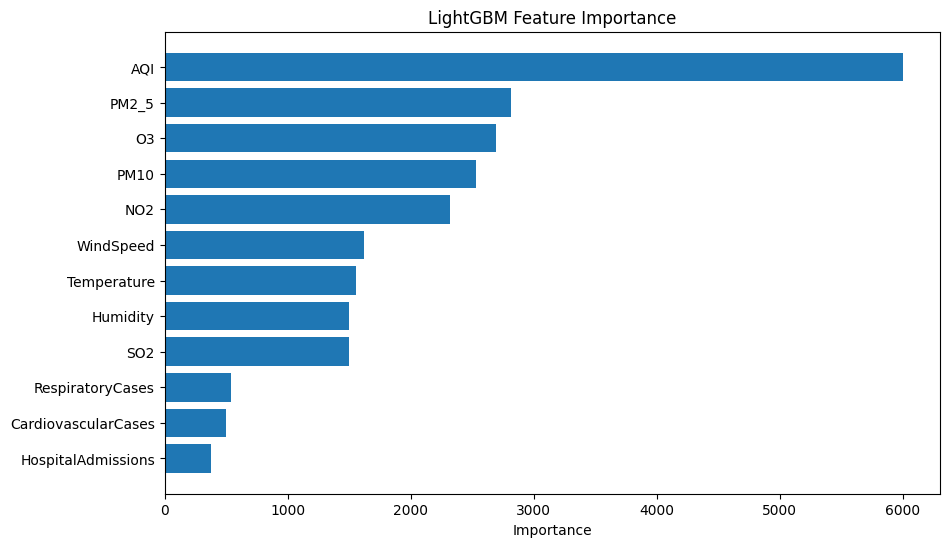

In [ ]:
# === LightGBM Feature Importance ===

import matplotlib.pyplot as plt
import pandas as pd

# Use the tuned LightGBM model
model_lgb = best_lgbm

# Extract feature importances
importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model_lgb.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\n=== LightGBM Feature Importance ===")
print(importance_df)

# Plot
plt.figure(figsize=(10,6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.gca().invert_yaxis()
plt.title("LightGBM Feature Importance")
plt.xlabel("Importance")
plt.show()
